In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
#root_dir = "/content/gdrive/My Drive/"
#base_dir = root_dir + 'ML-Projects/food_classifier/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import os
os.getcwd()

'/content'

In [0]:
os.chdir('/content/gdrive/My Drive/ML-Projects/food_classifier')

In [0]:
from fastai.vision import *

In [0]:
%%bash
unzip -q images.zip -d data/

In [0]:
path = Path("data")

In [0]:
!ls data/

In [0]:
np.random.seed(19)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes

In [0]:
data.c, len(data.train_ds), len(data.valid_ds)

(101, 80800, 20200)

## Initial traininig

In [9]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 77485671.49it/s]


In [10]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.854680,1.497821,0.602970,3:33:25
1,1.570416,1.219049,0.675148,37:11
2,1.307187,1.068865,0.711881,37:06
3,1.198811,0.983297,0.735545,37:47
4,1.066695,0.970442,0.739257,37:19


In [0]:
learn.save('res50-9')

## Train more

In [0]:
learn.unfreeze()

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


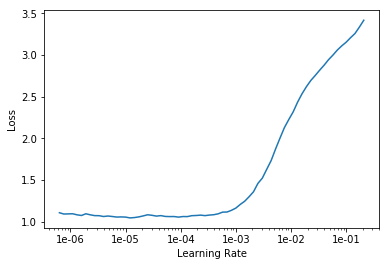

In [13]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.548281,0.653477,0.825693,39:09


In [0]:
learn.save('res50-9')

In [0]:
learn.load('res50-9')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.plot_confusion_matrix(figsize=(30,30), dpi=120)

In [0]:
learn.export()

## data cleaning

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('ep-9');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
ImageCleaner(ds, idxs, path)

## next